In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_36488\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[3159]

Unnamed: 0                         3159.000000
EPIC ID                       246906588.000000
Teff                               3891.988800
logg                                  4.880700
Flare #                              13.000000
Observation time                     80.542199
Average flare duration                0.221604
Longest flare duration                0.531221
Shortest flare duration               0.102158
Average percentage increase          21.689319
Highest percentage increase         158.781147
Lowest percentage increase            5.128539
Name: 3159, dtype: float64

In [4]:
flc = from_mast("246906588", mode="LC", mission="K2")

8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

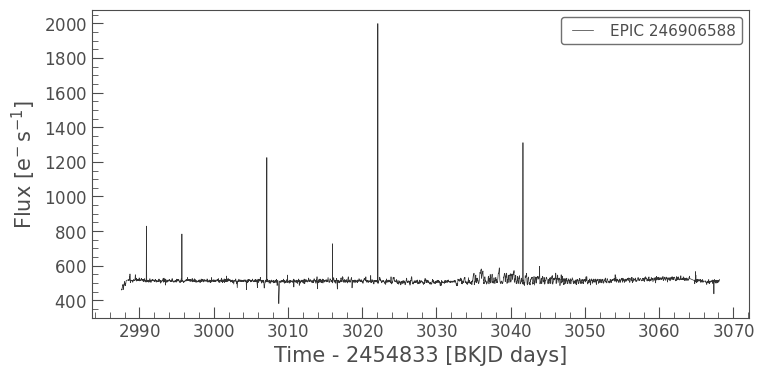

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

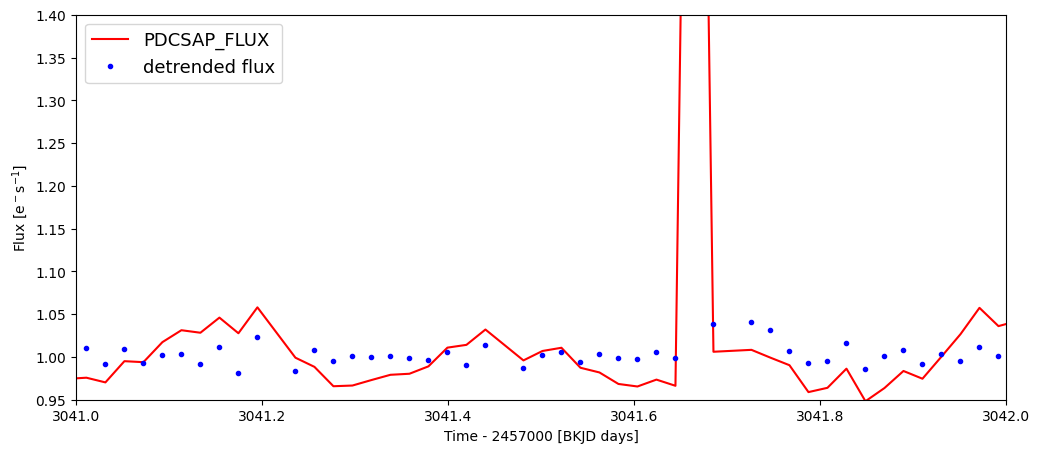

In [12]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(3041, 3042)
plt.ylim(0.95,1.4)
plt.legend(loc=2,fontsize=13);

In [10]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,2172,2180,143195,143204,3034.922537,3035.106421,925.3694347265994,34.487719360622435,0.08153140544891357,0.183884,3626.000000
1,2212,2235,143238,143264,3035.801096,3036.332318,4731.34402306971,58.03939997911815,0.15110886096954346,0.531221,3626.000000
2,2284,2290,143317,143324,3037.415192,3037.558213,833.5539451957761,31.19752868244106,0.08967161178588867,0.143021,3626.000000
3,2323,2335,143359,143373,3038.273319,3038.559361,2751.0177880333304,43.30182971142684,0.16278982162475586,0.286042,3626.000000
4,2357,2378,143397,143420,3039.049720,3039.519646,2670.857454017981,51.3061826832739,0.09849286079406738,0.469927,3626.000000
5,2384,2389,143426,143432,3039.642236,3039.764825,667.3699855300862,28.921018607211995,0.07565617561340332,0.122590,3626.000000
6,2393,2400,143436,143444,3039.846552,3040.010004,1079.858815060907,33.01752869342516,0.09154045581817627,0.163453,3626.000000
7,2404,2422,143448,143468,3040.091731,3040.500362,2833.9732240852222,50.33387023876494,0.12710309028625488,0.408632,3626.000000
8,2427,2433,143473,143480,3040.602520,3040.745541,638.519676366999,29.7750695721756,0.0755237340927124,0.143021,3626.000000
9,2475,2479,143525,143530,3041.664963,3041.767121,3065.2962463270787,12.387790620353085,1.5878114700317383,0.102158,3626.000000


In [9]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 0 candidate(s) in the (0,29) gap.
Found 0 candidate(s) in the (29,877) gap.
Found 0 candidate(s) in the (877,961) gap.
Found 13 candidate(s) in the (961,3484) gap.
Found 0 candidate(s) in the (3484,3538) gap.
Found 0 candidate(s) in the (3538,3626) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
